In [7]:
from netCDF4 import Dataset
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
import scipy.interpolate as interp
# from jupyterthemes import jtplot
# jtplot.style()
rcParams['figure.facecolor'] = 'white'
rcParams['axes.facecolor'] = 'white'
plt.style.use('ggplot')
%matplotlib notebook

In [8]:
class heat_budget:
    def __init__(self, infile):
        invars = Dataset(infile).variables
        self.tendency = invars['opottemptend'][:,:,:,:]
        self.diff = invars['opottempdiff'][:,:,:,:]
        self.boundary = invars['boundary_forcing_heat_tendency'][:,:,:,:]
        self.frazil = invars['frazil_heat_tendency'][:,:,:,:]
        self.advection_xy = invars['T_advection_xy'][:,:,:,:]
        self.vert_remap = invars['Th_tendency_vert_remap'][:,:,:,:]
        self.h = invars['h_adv'][:,:,:,:]
        self.umo = invars['umo'][:,:,:,:]
        self.depth = invars['thkcello'][:,:,:,:].cumsum(axis=1)
        try:
            self.zi = invars['z_i'][:]
        except:
            pass
        self.term_sum = self.diff + self.boundary + self.frazil + self.vert_remap + self.advection_xy
        self.error = self.tendency-self.term_sum
        Dataset(infile).close()
def compare_cum_integral(zn, zr, un, ur, varname):
    plt.figure(facecolor = 'white')
    plt.plot(un.cumsum(), zn, 'o-',label='Native')
    plt.plot(ur.cumsum(), zr, 'o-',label='Remapped')
    plt.gca().invert_yaxis()
    plt.ylabel('Depth (m)')
    plt.xlabel('Tendency Term')
#     plt.xlim(0,50)
    plt.legend()
    plt.title(varname)
    print("Error: %e %e" % (un.sum(), ur.sum()))
    
def difference_term(zn, zr, un, ur):
    print(ur.sum()-ur.sum())
    f = interp.interp1d(zn,un.cumsum())
    zr[zr>zn.max()] = zn.max()
    print(zr.max(),zn.max())
    zr = zr.data
#     zr[zr>zn.max()] = zn.max()
    diff = f(zr) - ur.cumsum()
    diff[-1] = un.sum() - ur.sum()
    plt.figure()
    plt.plot(diff,zr,'-x')
    plt.xlabel('Difference (Native-Remapped)')
    plt.ylabel('Heat Tendency')
    plt.gca().invert_yaxis()
    return diff, f(zr)

In [29]:
datapath = '/home/ashao/git/pristine/MOM6-examples/ice_ocean_SIS2/Mediterranean_OM4_05/'
nativefile = datapath + '19900101.ocean_annual.nc'
remapped_old_file = datapath + '19900101.ocean_annual_z.nc'
remapped_new_file = datapath + '19900101.ocean_annual_z_frac_dh.nc'
# native_budget = heat_budget ; remapped_budget = heat_budget
native = heat_budget(infile = nativefile)
remapped_old = heat_budget(infile = remapped_old_file)
remapped_new = heat_budget(infile = remapped_old_file)
# remapped_budget = remapped_budget.read_vars(remappedfile)
tidx = -1 ; latidx = 28 ; lonidx = 72
# tidx = -1 ; latidx = 16 ; lonidx = 61

<IPython.core.display.Javascript object>


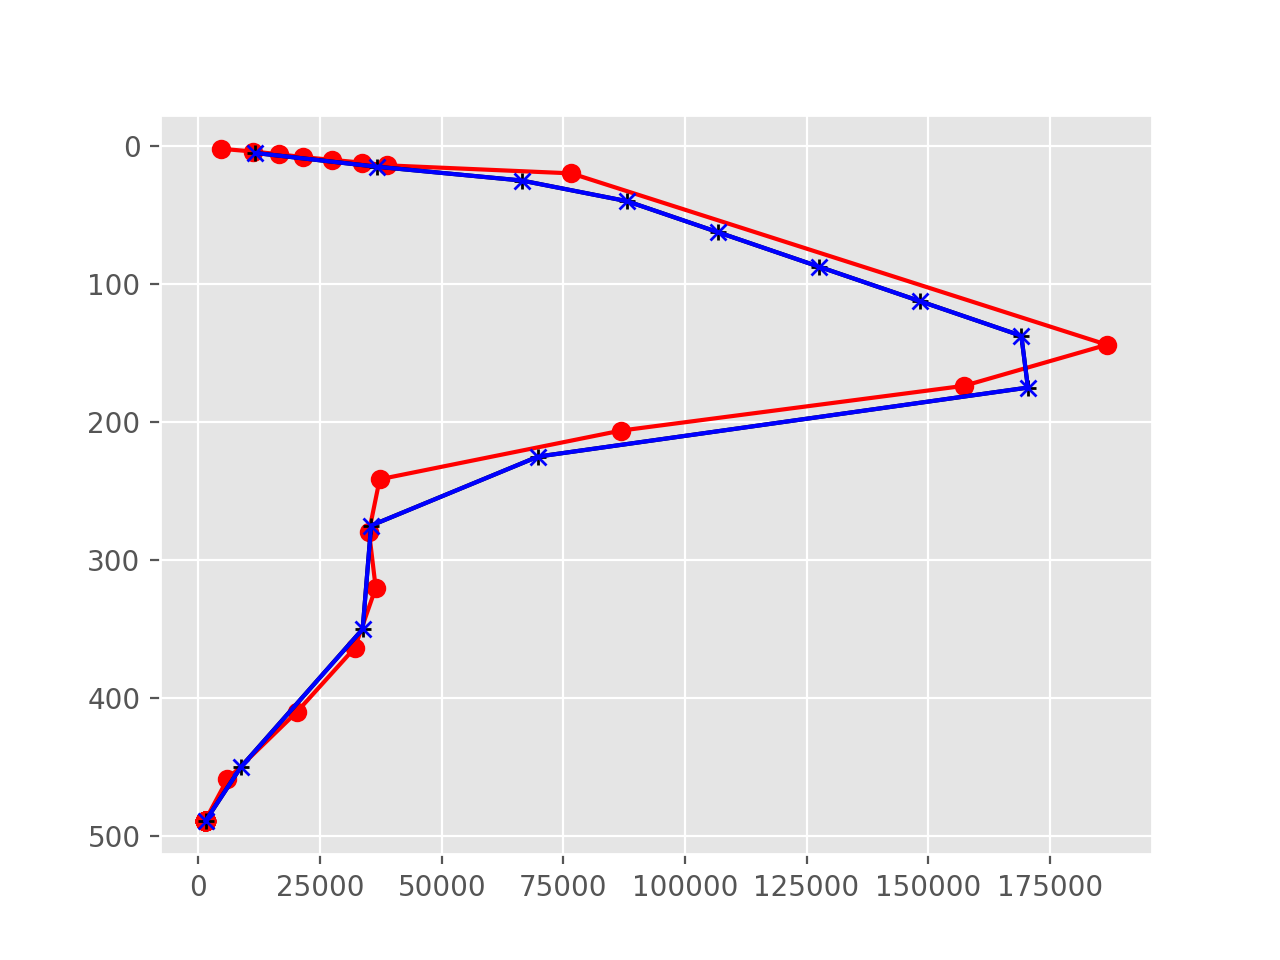

In [32]:
# diff, fint = difference_term(native.depth[tidx,:,latidx,lonidx], remapped.zi[1:],
#                       (native.advection_xy[tidx,:,latidx,lonidx]), (remapped.advection_xy[tidx,:,latidx,lonidx]))
znat = native.depth[tidx,:,latidx,lonidx]
# zplt = remapped.depth[tidx,:,latidx,lonidx]
# print(remapped.depth[tidx,:,latidx,lonidx])
plt.figure()
# plt.plot(fint,zplt,'rx',label='Native')
plt.plot((native.advection_xy[tidx,:,latidx,lonidx].cumsum()),native.depth[tidx,:,latidx,lonidx],'r-o',label='Native')
plt.plot((remapped_old.advection_xy[tidx,:,latidx,lonidx].cumsum()),remapped_old.depth[tidx,:,latidx,lonidx],'k-+',label='Remapped')
plt.plot((remapped_new.advection_xy[tidx,:,latidx,lonidx].cumsum()),remapped_new.depth[tidx,:,latidx,lonidx],'b-x',label='Remapped')
plt.gca().invert_yaxis()
# plt.ylim(0,100) ; plt.xlim(-20000,0)
#compare_cum_integral(native.depth[tidx,:,latidx,lonidx], remapped.depth[tidx,:,latidx,lonidx],
#                    (native.advection_xy[tidx,:,latidx,lonidx]), (remapped.advection_xy[tidx,:,latidx,lonidx]), "Advection")

0.0
488.696 488.696


/home/ashao/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


<IPython.core.display.Javascript object>


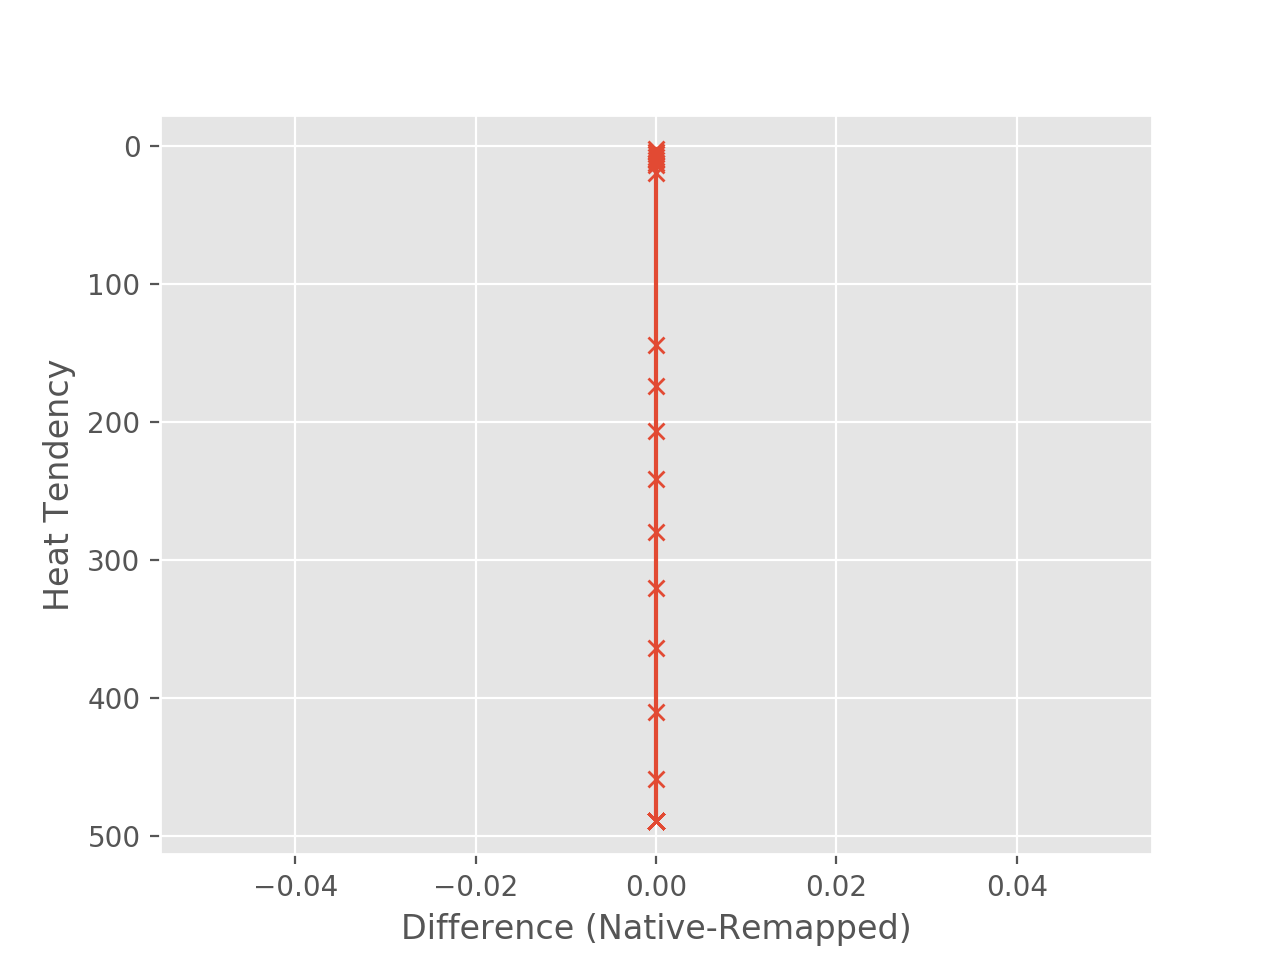

<IPython.core.display.Javascript object>


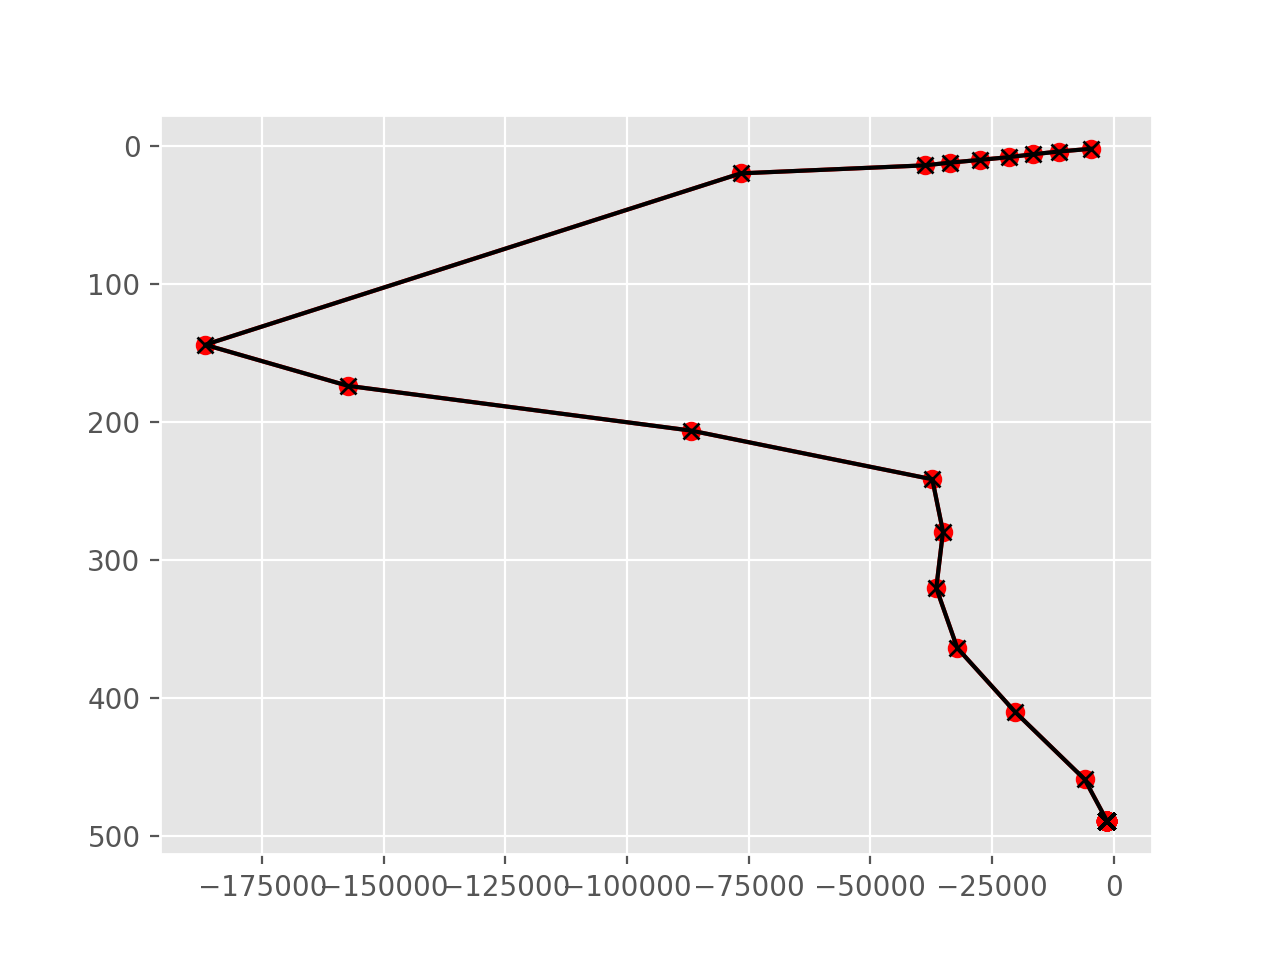

In [19]:
remapped = remapped_old
diff, fint = difference_term(native.depth[tidx,:,latidx,lonidx], remapped.depth[tidx,:,latidx,lonidx],
                    (native.advection_xy[tidx,:,latidx,lonidx]), (remapped.advection_xy[tidx,:,latidx,lonidx]))

zplt = remapped_old.depth[tidx,:,latidx,lonidx]
plt.figure()
# plt.plot(fint,zplt,'rx',label='Native')
plt.plot((-native.advection_xy[tidx,:,latidx,lonidx].cumsum()),native.depth[tidx,:,latidx,lonidx],'r-o',label='Native')
plt.plot((-remapped.advection_xy[tidx,:,latidx,lonidx].cumsum()),zplt,'k-x',label='Remapped')

plt.gca().invert_yaxis()
# plt.ylim(0,100) ; plt.xlim(-20000,0)
#compare_cum_integral(native.depth[tidx,:,latidx,lonidx], remapped.depth[tidx,:,latidx,lonidx],
#                    (native.advection_xy[tidx,:,latidx,lonidx]), (remapped.advection_xy[tidx,:,latidx,lonidx]), "Advection")

<IPython.core.display.Javascript object>


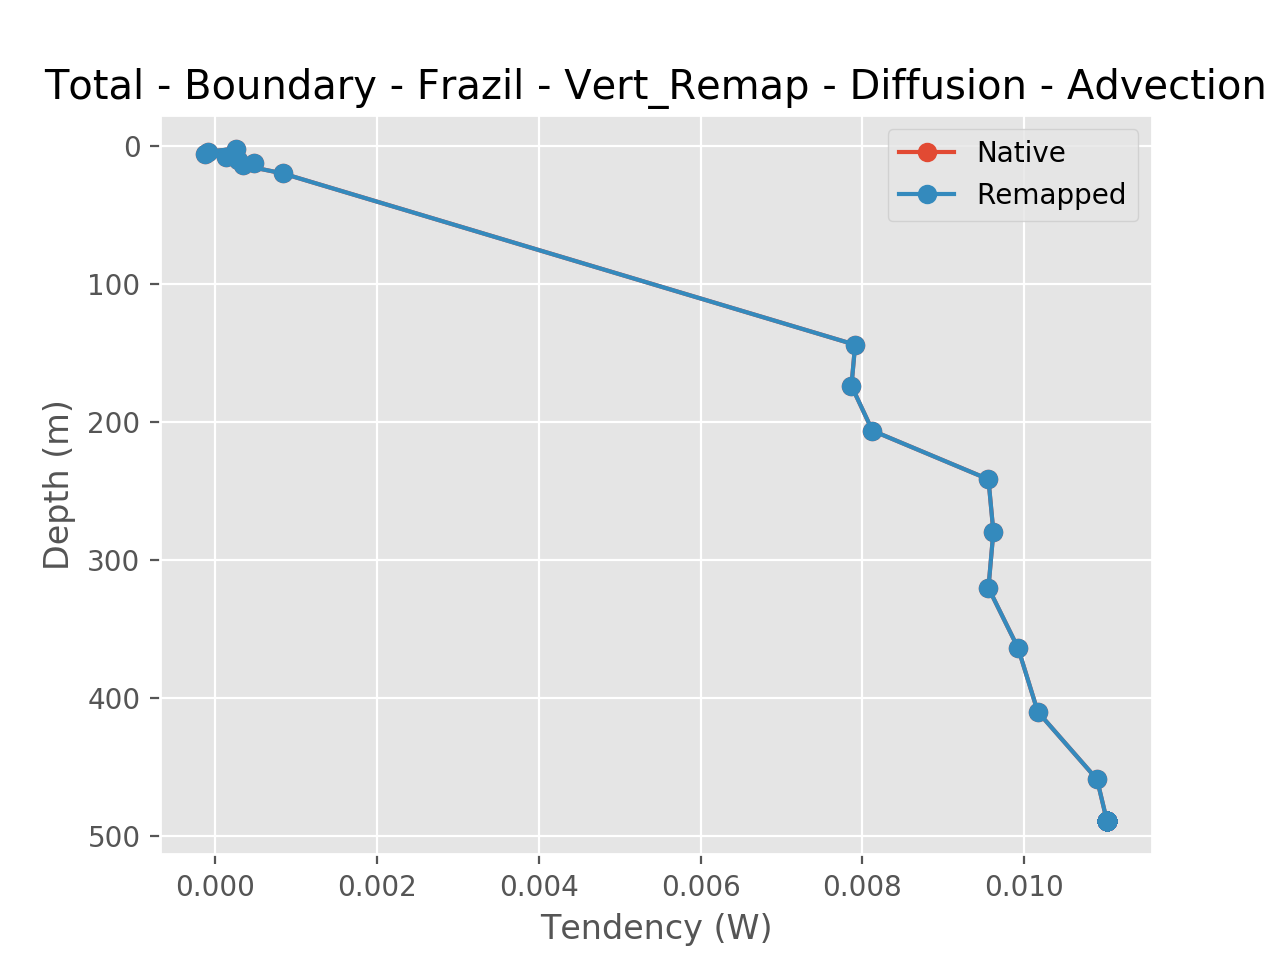

Text(0,0.5,'Depth (m)')

In [20]:
plt.figure()
plt.plot(native.error[tidx,:,latidx,lonidx].cumsum(),native.depth[tidx,:,latidx,lonidx],'-o',label='Native')
plt.plot(remapped.error[tidx,:,latidx,lonidx].cumsum(),remapped.depth[tidx,:,latidx,lonidx],'-o',label='Remapped')
plt.gca().invert_yaxis()
plt.legend()
plt.title('Total - Boundary - Frazil - Vert_Remap - Diffusion - Advection')# plt.xlim(0,150)
plt.xlabel('Tendency (W)')
plt.ylabel('Depth (m)')

0.0
488.696 488.696


/home/ashao/miniconda3/lib/python3.6/site-packages/ipykernel_launcher.py:35: MaskedArrayFutureWarning: setting an item on a masked array which has a shared mask will not copy the mask and also change the original mask array in the future.
Check the NumPy 1.11 release notes for more information.


<IPython.core.display.Javascript object>


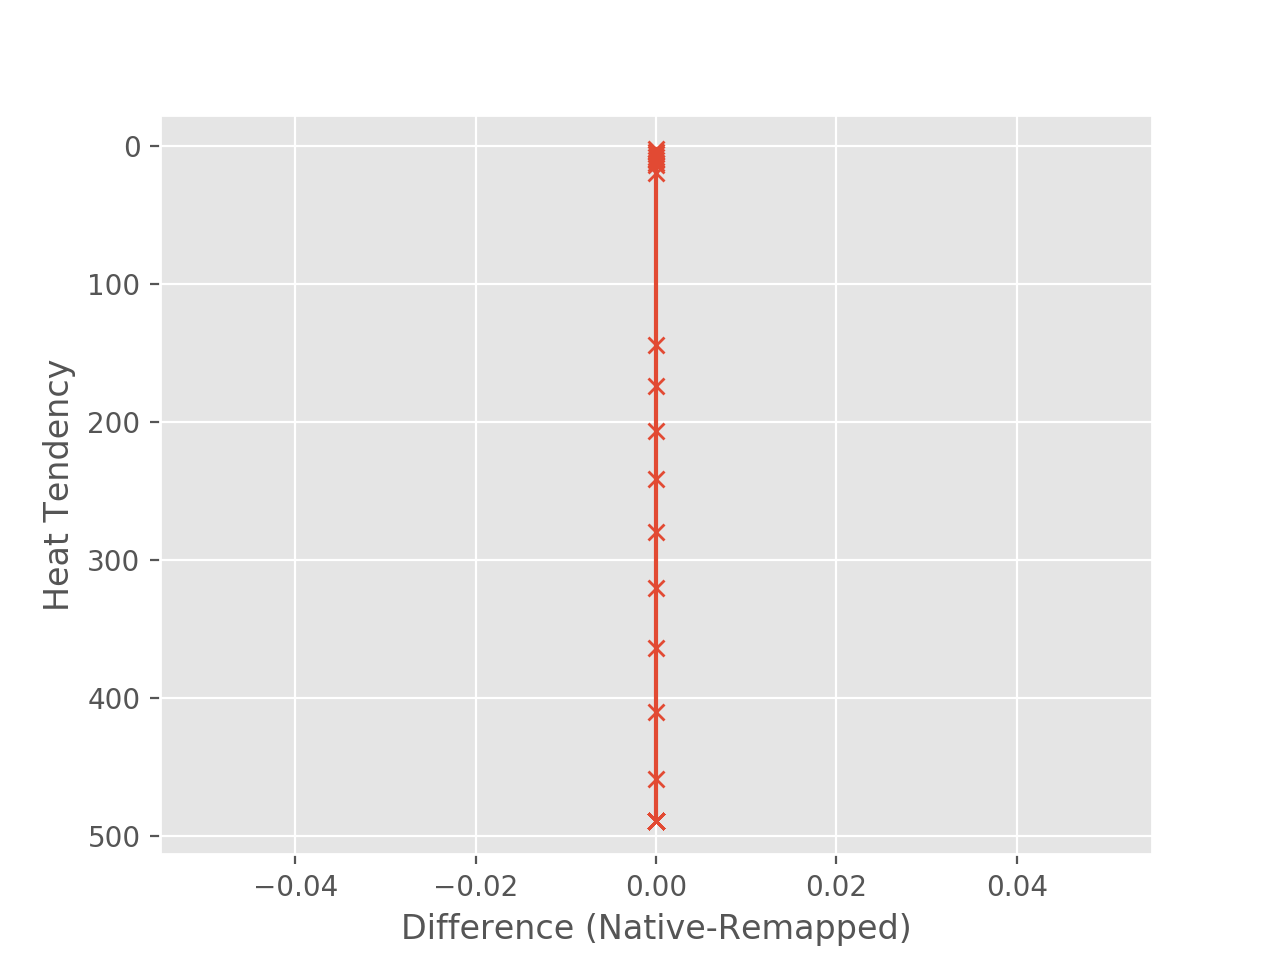

<IPython.core.display.Javascript object>


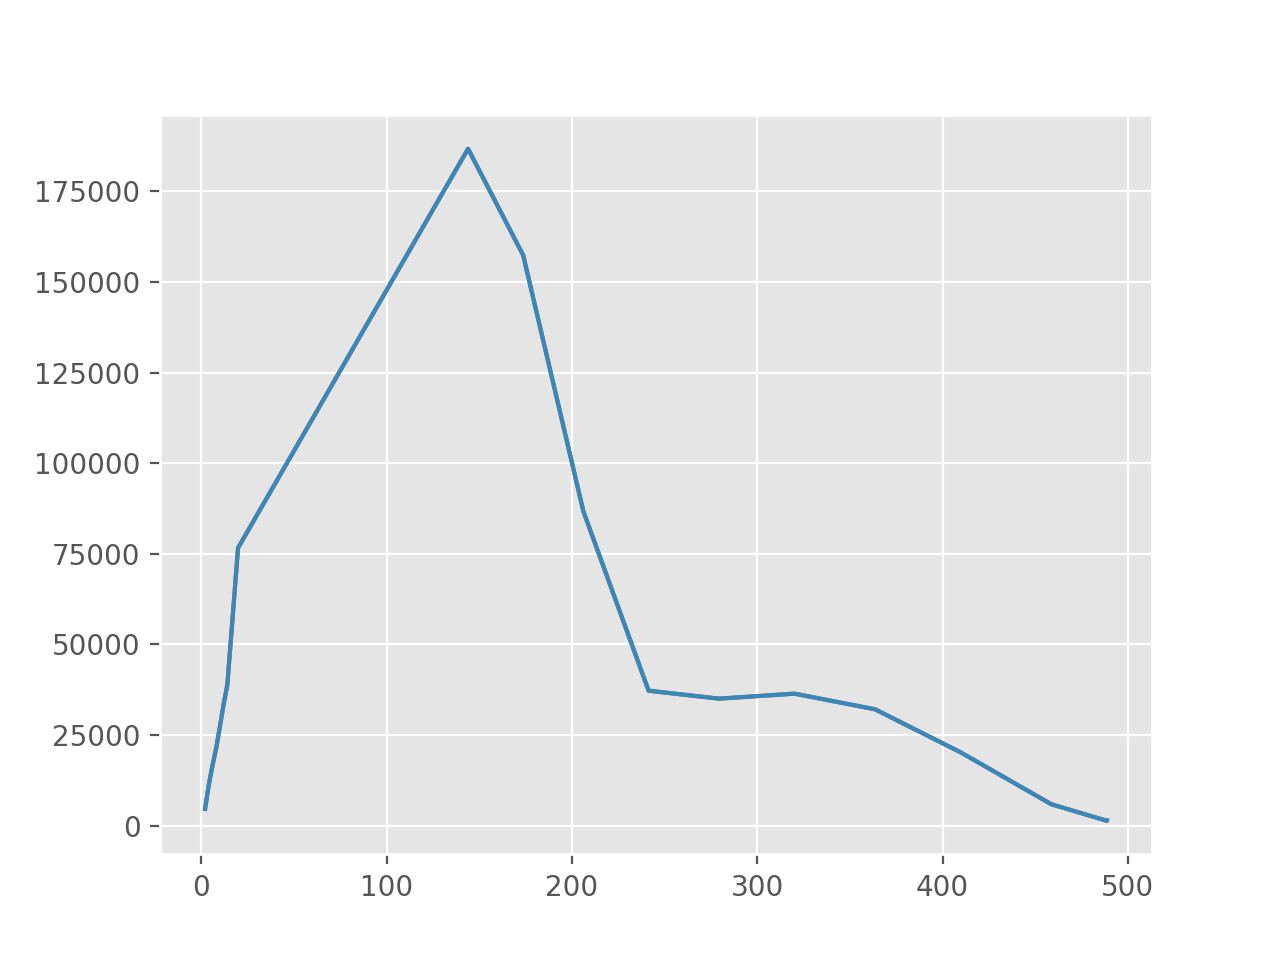

In [21]:
diff = difference_term(native.depth[tidx,:,latidx,lonidx], remapped.depth[tidx,:,latidx,lonidx],
                       native.advection_xy[tidx,:,latidx,lonidx], remapped.advection_xy[tidx,:,latidx,lonidx])
plt.figure()
plt.plot(remapped.depth[tidx,:,latidx,lonidx], remapped.advection_xy[tidx,:,latidx,lonidx].cumsum())
plt.plot(native.depth[tidx,:,latidx,lonidx], native.advection_xy[tidx,:,latidx,lonidx].cumsum())
# plt.xlim(0,100)
# plt.ylim(-2000,2000)
# plt.ylim(-2000,2000)

In [ ]:
compare_cum_integral(native.depth[tidx,:,latidx,lonidx], remapped.depth[tidx,:,latidx,lonidx],
                     native.boundary[tidx,:,latidx,lonidx], remapped.boundary[tidx,:,latidx,lonidx], "Boundary Forcing")

<IPython.core.display.Javascript object>


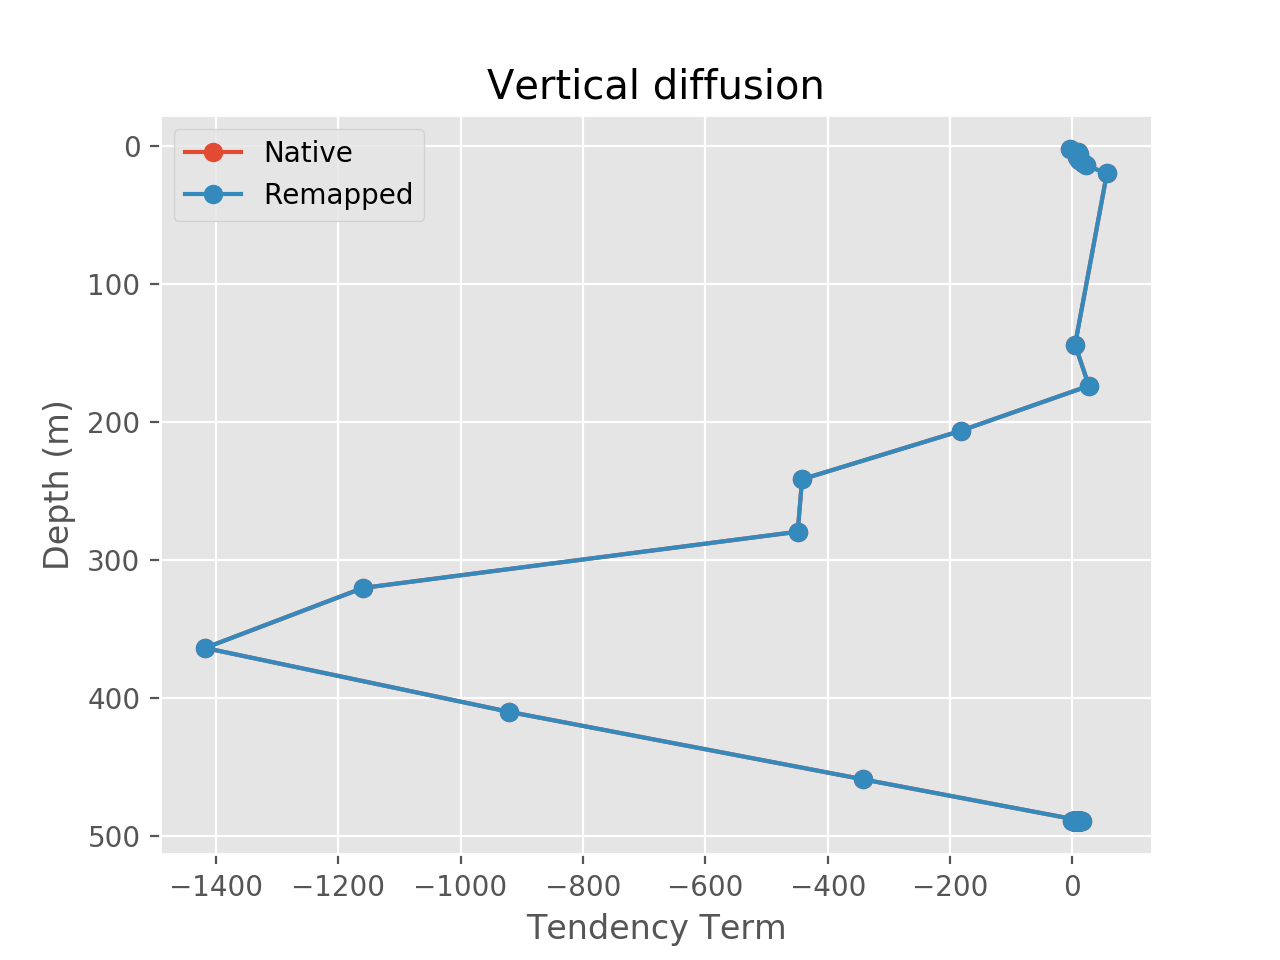

Error: -1.841784e-05 -1.841784e-05


In [22]:
compare_cum_integral(native.depth[tidx,:,latidx,lonidx], remapped.depth[tidx,:,latidx,lonidx],
                     native.diff[tidx,:,latidx,lonidx], remapped.diff[tidx,:,latidx,lonidx], "Vertical diffusion")

In [ ]:
compare_cum_integral(native.depth[tidx,:,latidx,lonidx], remapped.depth[tidx,:,latidx,lonidx],
                    native.vert_remap[tidx,:,latidx,lonidx], remapped.vert_remap[tidx,:,latidx,lonidx], "Vertical Remapping")


<IPython.core.display.Javascript object>


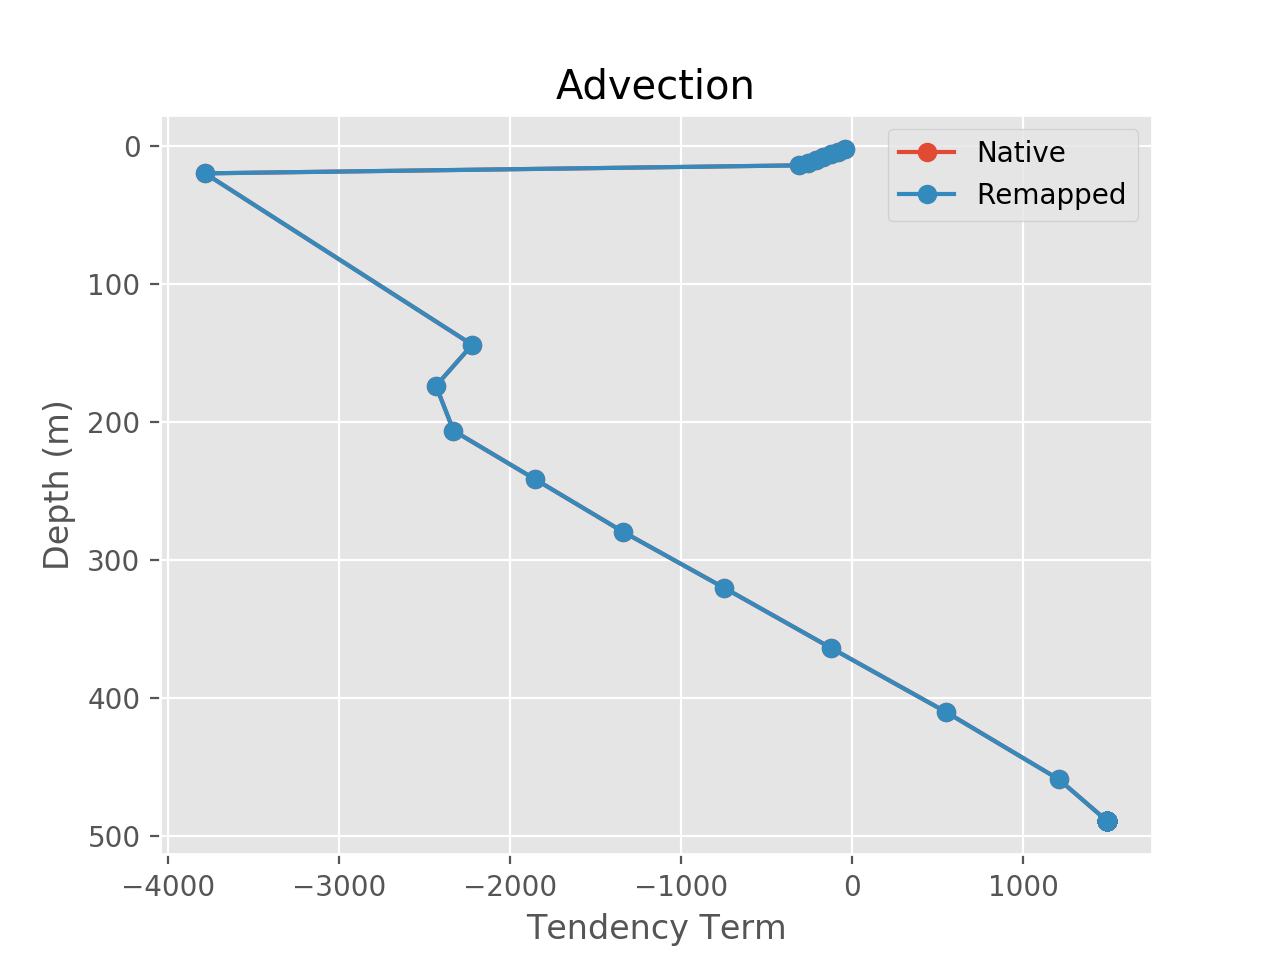

Error: 1.487684e+03 1.487684e+03


In [23]:
compare_cum_integral(native.depth[tidx,:,latidx,lonidx], remapped.depth[tidx,:,latidx,lonidx],
                    native.term_sum[tidx,:,latidx,lonidx], remapped.term_sum[tidx,:,latidx,lonidx], "Advection")
# plt.ylim(-5000,20000)

In [ ]:
compare_cum_integral(native.depth[tidx,:,latidx,lonidx], remapped.depth[tidx,:,latidx,lonidx],
                    native.tendency[tidx,:,latidx,lonidx], remapped.tendency[tidx,:,latidx,lonidx], "Total Tendency")

### Diabatic Terms First

In [24]:
native_diabatic = native.boundary + native.diff + native.frazil
remapped_diabatic = remapped.boundary + remapped.diff + remapped.frazil

<IPython.core.display.Javascript object>


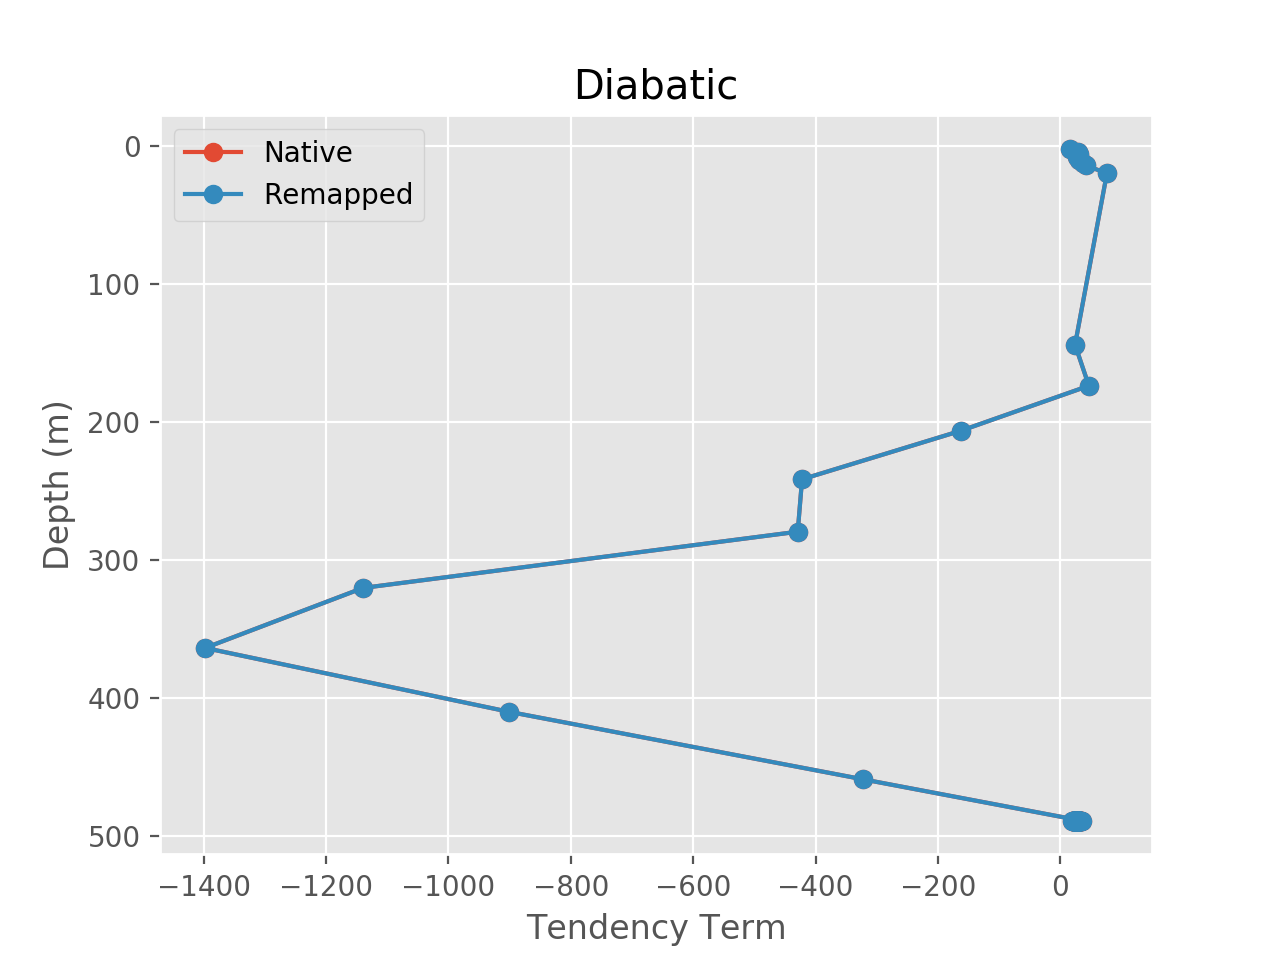

Error: 1.973662e+01 1.973662e+01


In [25]:
compare_cum_integral(native.depth[tidx,:,latidx,lonidx], remapped.depth[tidx,:,latidx,lonidx],
                    native_diabatic[tidx,:,latidx,lonidx], remapped_diabatic[tidx,:,latidx,lonidx], "Diabatic")

In [ ]:
compare_cum_integral(native.depth[tidx,:,latidx,lonidx], remapped.depth[tidx,:,latidx,lonidx],
                    native.error[tidx,:,latidx,lonidx], remapped.error[tidx,:,latidx,lonidx], "Estimated Error")

<IPython.core.display.Javascript object>


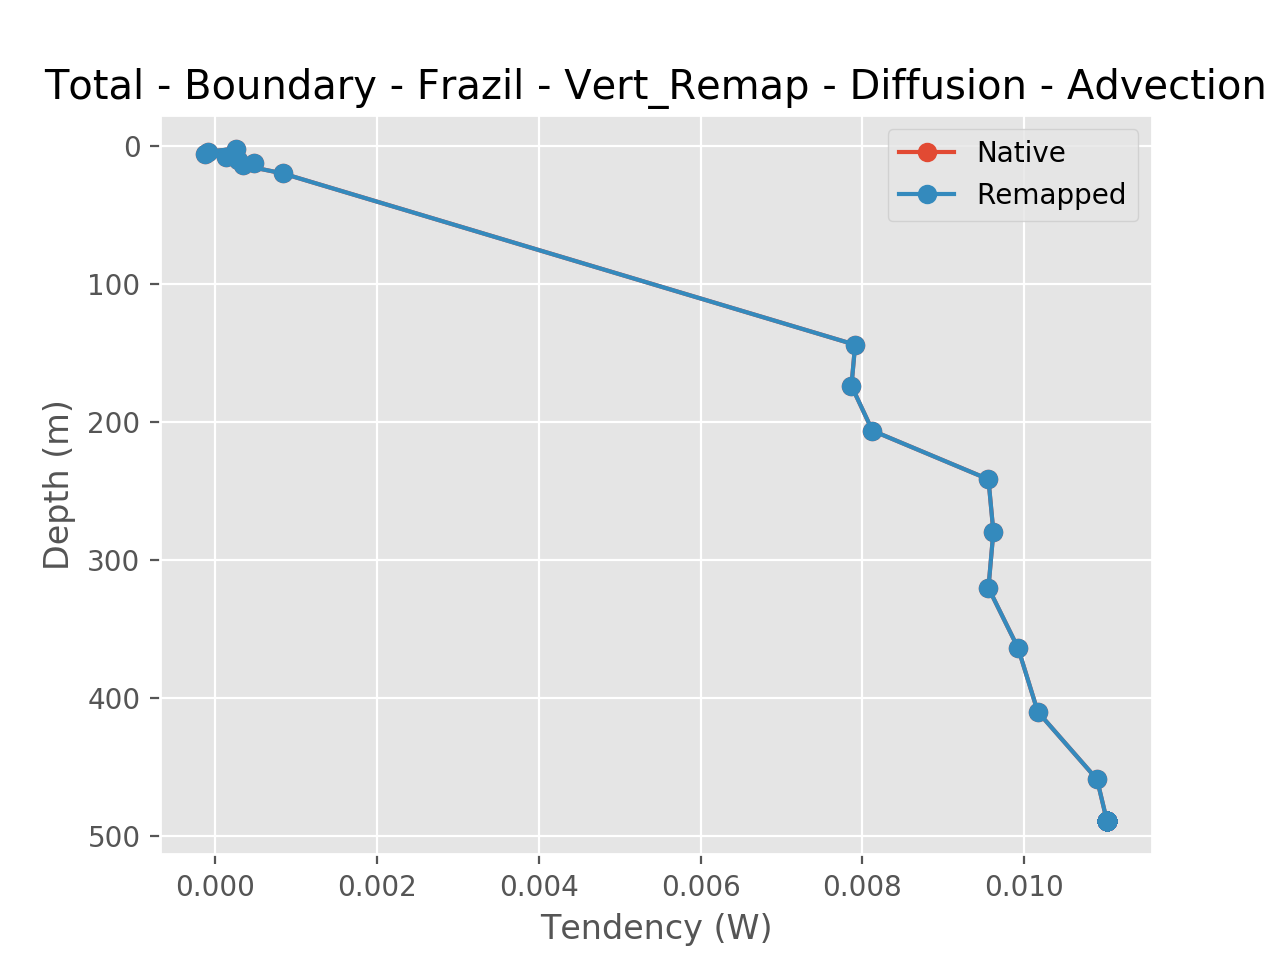

Text(0,0.5,'Depth (m)')

In [26]:
plt.figure()
plt.plot(native.error[tidx,:,latidx,lonidx].cumsum(),native.depth[tidx,:,latidx,lonidx],'-o',label='Native')
plt.plot(remapped.error[tidx,:,latidx,lonidx].cumsum(),remapped.depth[tidx,:,latidx,lonidx],'-o',label='Remapped')
plt.gca().invert_yaxis()
plt.legend()
plt.title('Total - Boundary - Frazil - Vert_Remap - Diffusion - Advection')# plt.xlim(0,150)
plt.xlabel('Tendency (W)')
plt.ylabel('Depth (m)')